# Graduation Prediction using Classification technique LogisticRegression

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA PROCESS

In [124]:
df = pd.read_csv(r"C:\Users\easil\Downloads\archive (1)\Admission_Predict_Ver1.1.csv") #reading the csv files

In [125]:
df #printing the dataframe

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [126]:
df1 = df #storing the dataframe into another variable

In [127]:
df1 #printing the dataframe stored in another variable

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [128]:
df1.columns #displaying the column names

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [129]:
df1.shape #checking the shape of the dataframe

(500, 9)

In [130]:
df1.dtypes #checking the data types of dataframe

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [131]:
df1.head() #displaying the top 5 rows of data frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [132]:
df1.tail() #displaying the bottom 5 rows of data frame

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [133]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [134]:
df1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [135]:
df1.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [136]:
df1.isnull().sum().sum()

0

In [137]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [138]:
df1.duplicated().sum()

0

In [139]:
df1.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
114,115,311,105,3,3.5,3.0,8.45,1,0.59
21,22,325,114,4,3.0,2.0,8.40,0,0.70
313,314,301,100,3,3.5,3.0,8.04,0,0.67
222,223,324,113,4,4.5,4.0,8.79,0,0.76
272,273,294,95,1,1.5,1.5,7.64,0,0.49
256,257,309,99,3,4.0,4.0,8.56,0,0.76
0,1,337,118,4,4.5,4.5,9.65,1,0.92
328,329,324,112,4,4.0,3.5,8.77,1,0.80
108,109,331,116,5,5.0,5.0,9.38,1,0.93
394,395,329,111,4,4.5,4.0,9.23,1,0.89


In [140]:
df1.drop(['Serial No.'],axis=1)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [141]:
df1.count()

Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

In [142]:
df1.count().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64>

# checking the special characters

In [143]:
column_name = 'GRE Score'

has_special_characters = df1[df1[column_name].notnull() & df1[column_name].astype(str).str.contains(r'[^a-zA-Z0-9\s]')]

print(has_special_characters[column_name])

Series([], Name: GRE Score, dtype: int64)


# checking Outlier Using boxplot

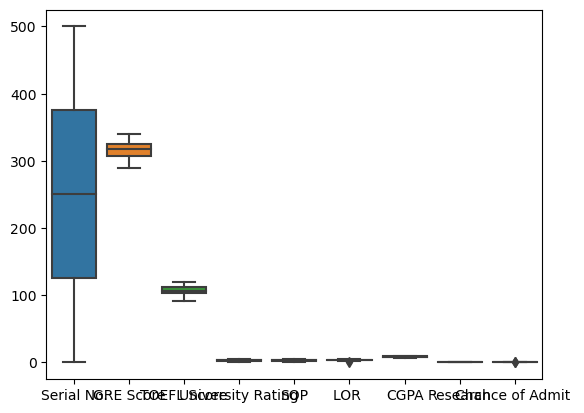

In [144]:
sns.boxplot(data = df1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score'>

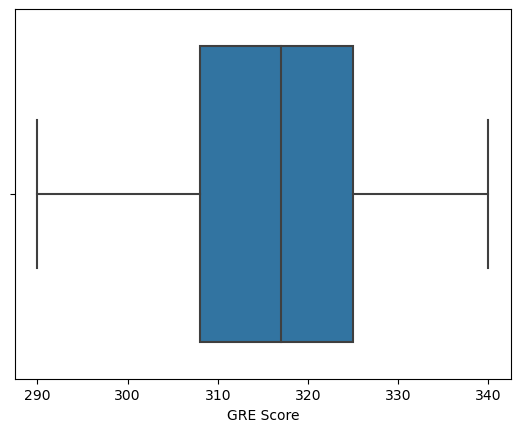

In [145]:
sns.boxplot(df1['GRE Score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOEFL Score'>

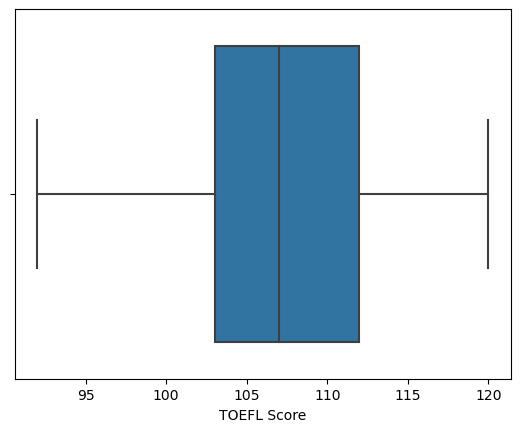

In [146]:
sns.boxplot(df1['TOEFL Score'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='University Rating'>

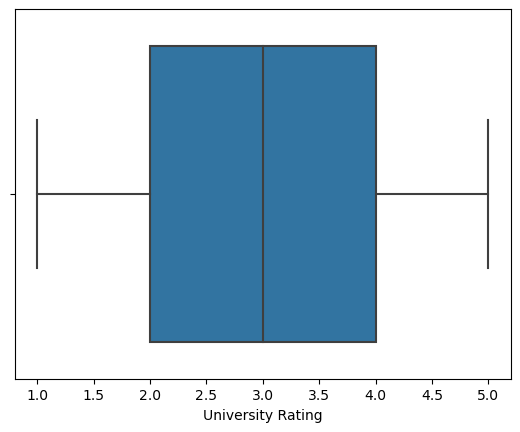

In [147]:
sns.boxplot(df1['University Rating'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SOP'>

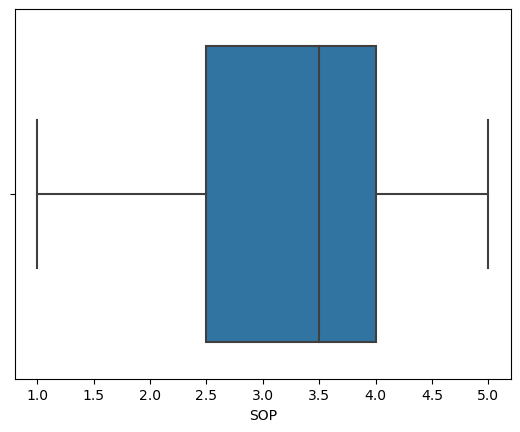

In [148]:
sns.boxplot(df1['SOP'])

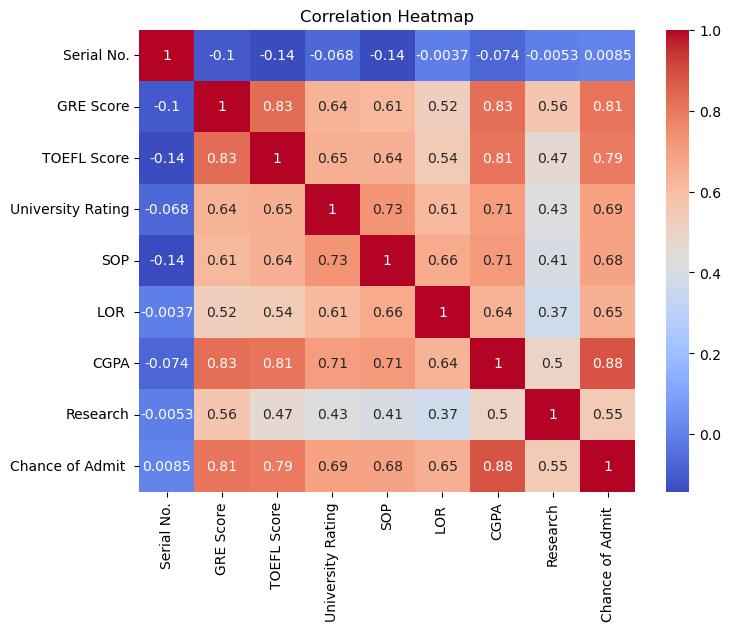

In [149]:
#heat map for checking correlation
corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))  # Adjust the figure size (optional)
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)  # 'cubehelix', 'coolwarm', 'magma', 'plasma', etc. are other available colormaps
plt.title('Correlation Heatmap')
plt.show()

# model building using Logistic Regression

In [150]:
#IMPORTING NECESSARY LIBRARIES OF LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [151]:
df2 = df1.copy()

In [152]:
x = df2.drop(columns=['Chance of Admit '],axis =1)
y = df2['Chance of Admit ']

In [153]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=100,test_size=0.20)

In [154]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(400, 8)
(400,)
(100, 8)
(100,)


In [155]:
# Converting Target variable to binary
# Accepctance percentage is 80%

ytrain_bin = [ 1 if i > 0.80 else 0 for i in ytrain]
ytest_bin = [ 1 if i > 0.80 else 0 for i in ytest]

In [156]:
#Using Logistic regression to predict the graduate admissions

lr_model = LogisticRegression()
lr_model.fit(xtrain,ytrain_bin)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [157]:
y_pred = lr_model.predict(xtest)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [158]:
print(classification_report(ytest_bin,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.90      0.80      0.85        35

    accuracy                           0.90       100
   macro avg       0.90      0.88      0.89       100
weighted avg       0.90      0.90      0.90       100



# data visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


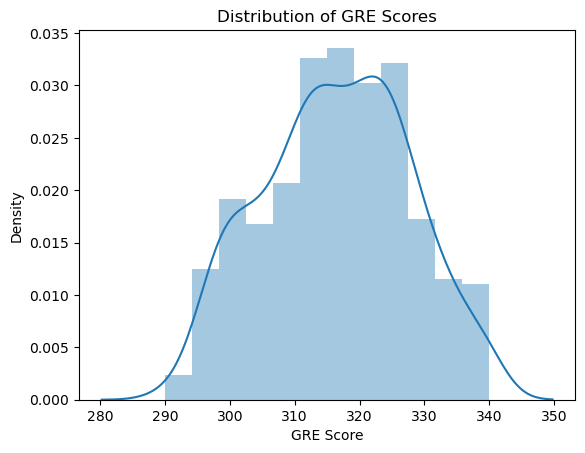

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


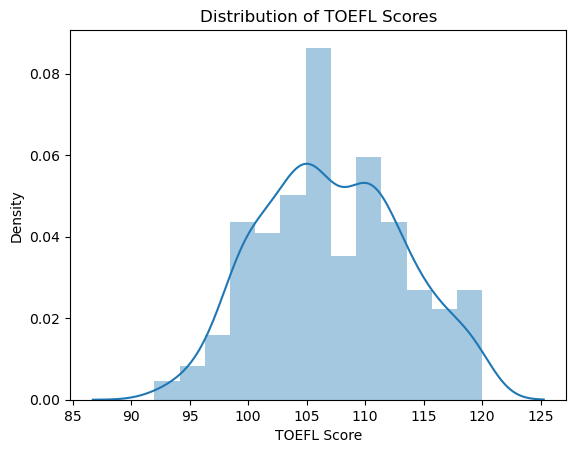

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


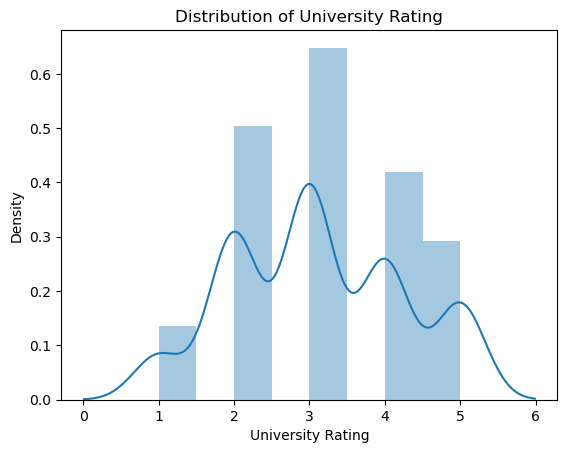

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


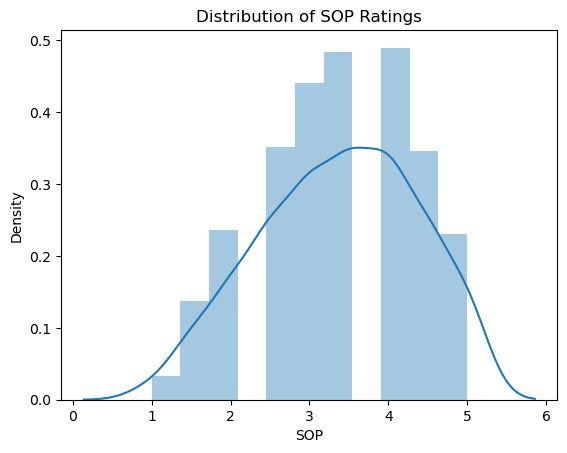

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


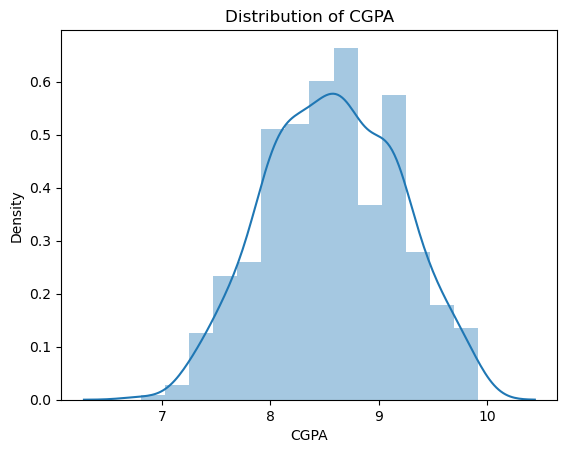

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df2['GRE Score'], kde=True)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df2['TOEFL Score'], kde=True)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df2['University Rating'], kde=True)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df2['SOP'], kde=True)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df2['CGPA'], kde=True)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

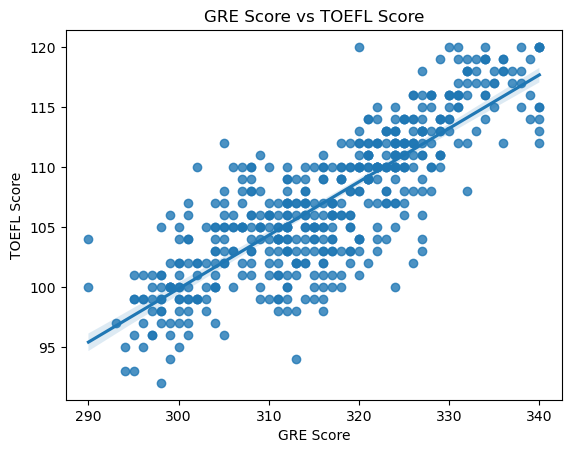

In [160]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df2)
plt.title("GRE Score vs TOEFL Score")
plt.show()

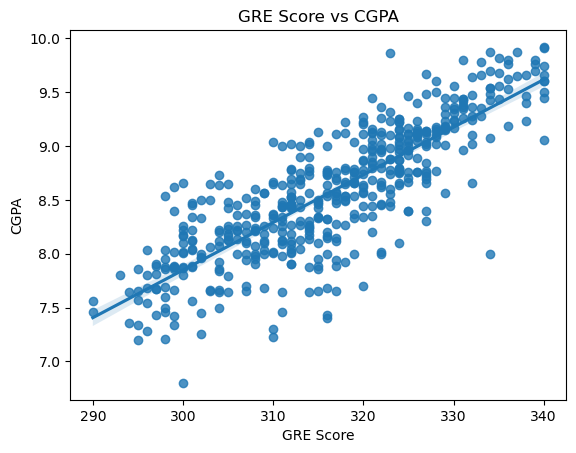

In [161]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df2)
plt.title("GRE Score vs CGPA")
plt.show()

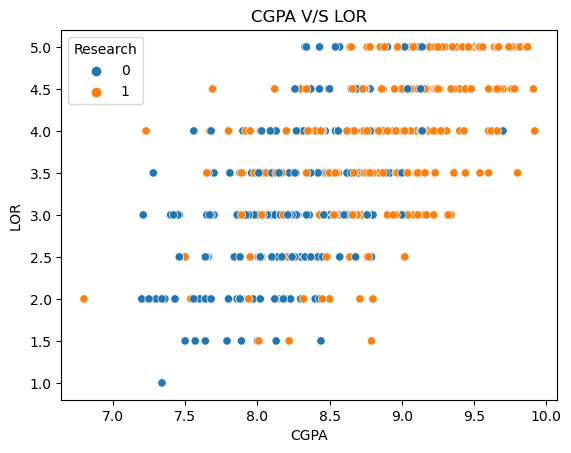

In [162]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=df2, hue="Research")
plt.title("CGPA V/S LOR")
plt.show()

# feature importance using logistic regression

In [163]:
# Extract coefficients from the logistic regression model
coefficients = lr_model.coef_[0]

# Create a DataFrame to store the feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': coefficients})

# Sort the features by their absolute coefficient values in descending order
feature_importance_df['Importance'] = feature_importance_df['Importance'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance DataFrame
print(feature_importance_df)


             Feature  Importance
6               CGPA    2.741322
7           Research    2.494268
3  University Rating    1.252234
4                SOP    0.287167
2        TOEFL Score    0.213270
1          GRE Score    0.173615
5               LOR     0.108832
0         Serial No.    0.000742


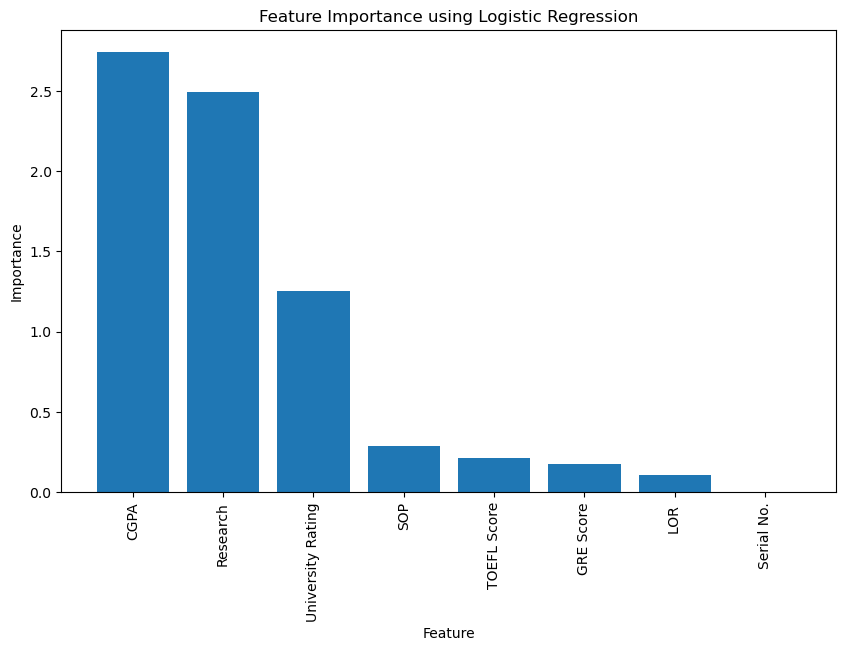

In [164]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance using Logistic Regression')
plt.show()